In [73]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import math
import csv

main_df = pd.read_csv("f051 - Sheet1.csv")

In [74]:
id = []
for i in range(len(main_df)):
    id.append(i)
main_df["ID"] = id

In [75]:
num_of_peaks = 50
main_df.head()

,Signal1,Signal2,ID
0,0,0,0
1,0,0,1
2,0,0,2
3,0,2,3
4,0,0,4


In [76]:
len(main_df)

39847

In [77]:
len(main_df)

39847

In [78]:
avg = main_df["Signal1"].mean()
print("Average1 :",avg)
avg2 = main_df["Signal2"].mean()
print("Average2:",avg2)

Average1 : 81.6865259618039
Average2: 47.38597635957537


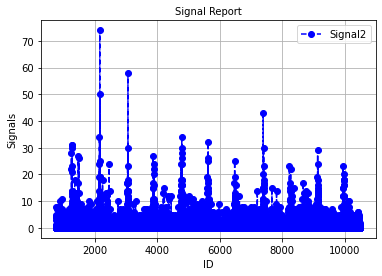

In [79]:
import csv
  
x = []
y1 = []
y2 = []
  
for i in range(754,10508):
    x.append(main_df["ID"][i])
    y1.append(main_df["Signal1"][i])
    y2.append(main_df["Signal2"][i])

  
  
plt.plot(x, y2, color = 'b', linestyle = 'dashed',
         marker = 'o',label = "Signal2")
  
plt.xlabel('ID')
plt.ylabel('Signals')
plt.title('Signal Report', fontsize = 10)
plt.grid()
plt.legend()
plt.show()


In [80]:
for i in range(len(main_df)):
    if(main_df.at[i,'Signal1']<avg and main_df.at[i,'Signal2']<avg2):
        main_df = main_df.drop(index = i)
        #print(i)

In [81]:
id = []
for i in range(len(main_df)):
    id.append(i)
main_df["ID"] = id

In [82]:
main_df.set_index("ID", inplace = True)
main_df.head()


,Signal1,Signal2
ID,,
0,21,85
1,23,74
2,9,50
3,25,58
4,0,49


In [83]:
len(main_df)

12076

Saving the raw data in a file

main_df.to_csv("f051ff_raw.csv")

In [84]:
limit = int(len(main_df)/num_of_peaks)
rms_id = []
rms_values = []
mean_values = []
kurtosis_values = []
sd_values = []
skew_values = []
rms_values2 = []
mean_values2 = []
kurtosis_values2 = []
sd_values2 = []
skew_values2 = []

In [85]:
for i in range(num_of_peaks):
    rms_id.append(i)  

In [86]:
from scipy import stats
from scipy.stats import kurtosis
for i in range(num_of_peaks):
    val = 0
    mean = 0
    val2 = 0
    mean2 = 0
    part_data_s1 = []
    part_data_s2 = []
    for j in range(limit):
        val = val + (main_df.at[i+j, 'Signal1'])*(main_df.at[i+j, 'Signal1'])
        mean = mean + (main_df.at[i+j, 'Signal1']) 
        val2 = val2 + (main_df.at[i+j, 'Signal2'])*(main_df.at[i+j, 'Signal2'])
        mean2 = mean2 + (main_df.at[i+j, 'Signal2']) 
        part_data_s1.append(main_df.at[i+j, 'Signal1'])
        part_data_s2.append(main_df.at[i+j, 'Signal2'])
    val = val/limit
    mean = mean/limit
    val2 = val2/limit
    mean2 = mean2/limit
    val = math.sqrt(val)
    val2 = math.sqrt(val)
    rms_values.append(val) 
    rms_values2.append(val2)
    mean_values.append(mean)
    mean_values2.append(mean2)
    kurtosis_values.append(kurtosis(part_data_s1)) 
    kurtosis_values2.append(kurtosis(part_data_s2))
    sd_values.append(stats.tstd(part_data_s1))
    sd_values2.append(stats.tstd(part_data_s2))
    skew_values.append(stats.skew(part_data_s1))
    skew_values2.append(stats.skew(part_data_s2))

In [87]:
print(rms_id) 
print(len(rms_id)) 
print(rms_values) 
print(len(rms_values))  
print(rms_values2) 
print(len(rms_values2)) 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
50
[124.96416083732142, 125.07116646332969, 125.25573839150046, 125.2544132946721, 125.48635673307707, 125.75694465368784, 126.03538000279181, 126.57336776504721, 126.83332742642247, 126.16627703384496, 126.07784264746523, 125.97948196241589, 125.89289394913426, 125.89941977791216, 126.40783958565898, 126.50601481444416, 126.59185568318051, 126.30001166293727, 126.45089906963364, 125.61754509165816, 124.81945467578429, 125.12310950068469, 125.17184867710796, 125.44311501128486, 125.33346392094666, 125.36385218907661, 125.51806337083578, 125.41011560251303, 126.19072701693354, 126.92252676664562, 127.19399043712522, 127.53177132422898, 126.53115339742615, 126.22896275159833, 124.6171065163789, 124.51317649281923, 124.78906684208958, 124.75349968897588, 125.03033656773329, 125.02899248836488, 125.254

In [88]:
print(rms_values2) 
print(len(rms_values2))  

[11.178736996518051, 11.18352209562487, 11.191771012288468, 11.191711812527702, 11.202069305850463, 11.21414038853125, 11.22654800028895, 11.250483001411416, 11.26203034210184, 11.232376286158017, 11.228439012056183, 11.224058177077303, 11.220200263325706, 11.220491066700786, 11.243124102564153, 11.247489267140653, 11.251304621384158, 11.238327796560183, 11.24503886474536, 11.207923317531137, 11.172262737502384, 11.185844156820918, 11.188022554370722, 11.200139062140472, 11.195242914780664, 11.196600028092305, 11.203484429892148, 11.198665795643382, 11.233464604338838, 11.265989826315556, 11.278031319211932, 11.292996560888035, 11.248606731387943, 11.235166342853956, 11.163203237260303, 11.158547239350614, 11.17090268698504, 11.16931061834059, 11.181696497747257, 11.181636395821718, 11.191731792551986, 11.20255041965427, 11.1982499264975, 11.204350357064975, 11.20982229605394, 11.219247650497492, 11.215241377184794, 11.209948958499282, 11.212257586485507, 11.206125838674946]
50


In [89]:
data = {'ID': rms_id,
        'rms':rms_values,
        'mean': mean_values,
        'kurtosis':kurtosis_values,
        'SD': sd_values,
        'skewness':skew_values,
        'rms2':rms_values2,
        'mean2': mean_values2,
        'kurtosis2':kurtosis_values2,
        'SD2': sd_values2,   
        'skewness2':skew_values2
       }
df = pd.DataFrame(data)

In [90]:
df.to_csv("f051_50.csv")